# Outline
[1. Cancer omic resources](#1.-Cancer-omic-resources)
   - [1.1. Xena overview & searching](#1.1.-Xena-overview-&-searching)
       * [1.1.1. overview](#1.1.1.-overview)
       * [1.1.2. searching](#1.1.2.-searching)
   - [1.2. access Xena via *UCSCXenaTools* package](#1.2.-access-Xena-via-UCSCXenaTools-package)
       * [1.2.1. step 1: generate](#1.2.1.-step-1:-generate)
       * [1.2.2. step2~4: query, download, prepare](#1.2.2.-step2~4:-query,-download,-prepare)
   - [1.3 direct download from Xena](#1.3-direct-download-from-Xena)

In [45]:
# Global setting for jupyter lab, NOT RUN
suppressMessages(library(repr))
options(repr.plot.width=12, repr.plot.height=10)

# 1. Cancer omic resources
Various databases and web tools are providing public cancer data and some of them are also visualizing summary plots and advanced survival analysis upon user query. And among numerous cancer data contributors, the Cancer Genome Atlas (TCGA) is one of widely recognized by researcher and also archived by databases including [Genomic Data Commons (GDC)](https://portal.gdc.cancer.gov/), [cBioPortal](https://www.cbioportal.org/), [Broad GDAC Firehose](https://gdac.broadinstitute.org/), [UCSC Xena](http://xena.ucsc.edu/). Furthermore, apart from direct download, these sources and numerous R packages ([RTCGAToolbox](https://bioconductor.org/packages/release/bioc/html/RTCGAToolbox.html), [TCGAbiolinks](https://bioconductor.org/packages/release/bioc/html/TCGAbiolinks.html), [cBioPortalData](https://docs.cbioportal.org/6.-web-api-and-clients/api-and-api-clients#r-client), etc.) are providing access for cancer data. With this section, we will use *UCSC Xena* for followed demonstration.
> Xena is a genomic data accessing-hub hosted by UCSC providing the collection of other public databases (TCGA, Broad Institute, ICGC, GTex, CCLE, etc.). Users can access, download, analyze data like cancer or single-cell datasets directly on the website or locally on personal device for the data deployed on Xena are tier-3 public data. And *UCSCXenaTools* is the R package providing the accession inside R environment for convenient analysis workflow.

## 1.1. Xena overview & searching

### 1.1.1. overview
[Xena datasets viewpage](https://xenabrowser.net/datapages/)

In [ ]:
library(tidyverse)
library(UCSCXenaTools)
data(XenaData)

In [2]:
head(XenaData)

XenaHosts,XenaHostNames,XenaCohorts,XenaDatasets,SampleCount,DataSubtype,Label,Type,AnatomicalOrigin,SampleType,Tags,ProbeMap,LongTitle,Citation,Version,Unit,Platform
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://ucscpublic.xenahubs.net,publicHub,Breast Cancer Cell Lines (Neve 2006),ucsfNeve_public/ucsfNeveExp_genomicMatrix,51,gene expression,Neve Cell Line gene expression,genomicMatrix,Breast,cell line,"cell lines,breast cancer",probeMap/affyU133_ucscGenomeBrowser_hg18.probeMap,Cell Line Gene Expression (Neve et al. Cancer Cell 2006),Cancer Cell. 2006 Dec;10(6):515-27.,2011-11-01,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Breast Cancer Cell Lines (Neve 2006),ucsfNeve_public/ucsfNeve_public_clinicalMatrix,57,phenotype,Phenotypes,clinicalMatrix,,,cancer,NA,NA,NA,2011-11-11,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Glioma (Kotliarov 2006),kotliarov2006_public/kotliarov2006_genomicMatrix,194,copy number,Kotliarov Glioma CGH,genomicMatrix,Brain,tumor,"cancer,neural",probeMap/probesAffy100K,Glioma CGH (Kotliarov et al. 2006),Cancer Res. 2006 Oct 1;66(19):9428-36.,2011-11-01,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Glioma (Kotliarov 2006),kotliarov2006_public/kotliarov2006_public_clinicalMatrix,194,phenotype,Phenotypes,clinicalMatrix,,,cancer,NA,NA,NA,2011-11-11,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Lung Cancer CGH (Weir 2007),weir2007_public/weir2007_genomicMatrix,383,copy number,CGH,genomicMatrix,Lung,tumor,cancer,probeMap/probeAffy500K,Lung CGH (Weir et al. 2007),Nature. 2007 Dec 6;450(7171):893-8. Epub 2007 Nov 4.,2011-11-01,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Lung Cancer CGH (Weir 2007),weir2007_public/weir2007_public_clinicalMatrix,383,phenotype,Phenotypes,clinicalMatrix,,,cancer,NA,NA,NA,2011-11-11,NA,NA


### 1.1.2. searching

#### *OR*

In [3]:
XenaScan(
    pattern = 'Glioblastoma|gene expression', 
    ignore.case = T) %>%
    head(3)

XenaHosts,XenaHostNames,XenaCohorts,XenaDatasets,SampleCount,DataSubtype,Label,Type,AnatomicalOrigin,SampleType,Tags,ProbeMap,LongTitle,Citation,Version,Unit,Platform
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://ucscpublic.xenahubs.net,publicHub,Breast Cancer Cell Lines (Neve 2006),ucsfNeve_public/ucsfNeveExp_genomicMatrix,51,gene expression,Neve Cell Line gene expression,genomicMatrix,Breast,cell line,"cell lines,breast cancer",probeMap/affyU133_ucscGenomeBrowser_hg18.probeMap,Cell Line Gene Expression (Neve et al. Cancer Cell 2006),Cancer Cell. 2006 Dec;10(6):515-27.,2011-11-01,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Breast Cancer (Chin 2006),chin2006_public/chin2006Exp_genomicMatrix,118,gene expression,Gene expression,genomicMatrix,Breast,tumor,cancer,probeMap/affyU133_ucscGenomeBrowser_hg18.probeMap,Gene Expression (Chin et al. Cancer Cell 2006),Cancer Cell. 2006 Dec;10(6):529-41.,2011-11-01,NA,NA
https://ucscpublic.xenahubs.net,publicHub,Melanoma (Lin 2008),lin2008_public/lin2008Exp_genomicMatrix,95,gene expression,Lin Gene Exp,genomicMatrix,Skin,tumor,cancer,probeMap/affyU133_ucscGenomeBrowser_hg18.probeMap,Melanoma Gene Expression (Lin et al. 2008),Cancer Res. 2008 Feb 1;68(3):664-73.,2011-11-01,NA,NA


#### *AND*

In [4]:
XenaScan(
    pattern = 'Glioblastoma.*gene expression|gene expression.*Glioblastoma', 
    ignore.case = T) %>%
    head(3)

XenaHosts,XenaHostNames,XenaCohorts,XenaDatasets,SampleCount,DataSubtype,Label,Type,AnatomicalOrigin,SampleType,Tags,ProbeMap,LongTitle,Citation,Version,Unit,Platform
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://tcga.xenahubs.net,tcgaHub,TCGA Glioblastoma (GBM),TCGA.GBM.sampleMap/HT_HG-U133A,539,gene expression array,AffyU133a,genomicMatrix,Brain,tumor,"cancer,nervous system",NA,TCGA glioblastoma multiforme (GBM) gene expression (AffyU133a array),NA,2017-09-08,log2(affy RMA),AffyU133a
https://tcga.xenahubs.net,tcgaHub,TCGA Glioblastoma (GBM),TCGA.GBM.sampleMap/HiSeqV2_percentile,172,gene expression RNAseq,IlluminaHiSeq percentile,genomicMatrix,Brain,tumor,"cancer,nervous system",probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA glioblastoma multiforme (GBM) gene expression by RNAseq (polyA+ IlluminaHiSeq percentile),NA,2017-10-13,percentile rank,IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Glioblastoma (GBM),TCGA.GBM.sampleMap/HiSeqV2_PANCAN,172,gene expression RNAseq,IlluminaHiSeq pancan normalized,genomicMatrix,Brain,tumor,"cancer,nervous system",probeMap/hugo_gencode_good_hg19_V24lift37_probemap,"TCGA glioblastoma multiforme (GBM) gene expression by RNAseq (ployA+ IlluminaHiSeq), pancan normalized",NA,2017-10-13,pan-cancer normalized log2(norm_count+1),IlluminaHiSeq_RNASeqV2


#### *grep*

In [5]:
XenaData %>%
    filter(
        grepl(XenaHostNames, pattern = 'tcga', ignore.case = T), 
        grepl(DataSubtype, pattern = 'gene expression', ignore.case = T),
        grepl(AnatomicalOrigin, pattern = 'brain', ignore.case = T)
    ) %>%
    head(3)

XenaHosts,XenaHostNames,XenaCohorts,XenaDatasets,SampleCount,DataSubtype,Label,Type,AnatomicalOrigin,SampleType,Tags,ProbeMap,LongTitle,Citation,Version,Unit,Platform
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://tcga.xenahubs.net,tcgaHub,TCGA Lower Grade Glioma (LGG),TCGA.LGG.sampleMap/HiSeqV2_percentile,530,gene expression RNAseq,IlluminaHiSeq percentile,genomicMatrix,Brain,tumor,"cancer,nervous system",probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA brain lower grade glioma (LGG) gene expression by RNAseq (polyA+ IlluminaHiSeq percentile),NA,2017-10-13,percentile rank,IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Lower Grade Glioma (LGG),TCGA.LGG.sampleMap/HiSeqV2_PANCAN,530,gene expression RNAseq,IlluminaHiSeq pancan normalized,genomicMatrix,Brain,tumor,"cancer,nervous system",probeMap/hugo_gencode_good_hg19_V24lift37_probemap,"TCGA brain lower grade glioma (LGG) gene expression by RNAseq (ployA+ IlluminaHiSeq), pancan normalized",NA,2017-10-13,pan-cancer normalized log2(norm_count+1),IlluminaHiSeq_RNASeqV2
https://tcga.xenahubs.net,tcgaHub,TCGA Lower Grade Glioma (LGG),TCGA.LGG.sampleMap/HiSeqV2,530,gene expression RNAseq,IlluminaHiSeq,genomicMatrix,Brain,tumor,"cancer,nervous system",probeMap/hugo_gencode_good_hg19_V24lift37_probemap,TCGA brain lower grade glioma (LGG) gene expression by RNAseq (polyA+ IlluminaHiSeq),NA,2017-10-13,log2(norm_count+1),IlluminaHiSeq_RNASeqV2


## 1.2. access Xena via *UCSCXenaTools* package

[![](https://mermaid.ink/img/pako:eNqNkVFrgzAUhf9KyJMDK1jffBisTTf2ttE9FGoZt-aqgZhITBil9r8vzqivy9PlnC-He7h3WmqONKe1ga4hX6xQxL_eXSfhDRUasDjJL99plCaklvoKkvQIpmyeZmsbbROiq0qUYjQtdouVRVlCOFjo0b4z4nqoMZio-DTsok-H5hbkfcT0j5IaeBBY9GGwA4NLaEo2m2cynFDBsQQVk3Ga9x12y1or5k0YzQl9FdKiWcHsf-DpvBS5kE3iv_ivocKa8Ndl2K_CXGdgqxYaDYcz85EXGtMWTQuC-3vcx8iC2gZbLGjuR44VOGkLWqiHR13n98ADF1Ybmlcge4wpOKuPN1XS3BqHM8QE-Gu2gXr8AgTsnug)](https://mermaid-js.github.io/mermaid-live-editor/edit#pako:eNqNkVFrgzAUhf9KyJMDK1jffBisTTf2ttE9FGoZt-aqgZhITBil9r8vzqivy9PlnC-He7h3WmqONKe1ga4hX6xQxL_eXSfhDRUasDjJL99plCaklvoKkvQIpmyeZmsbbROiq0qUYjQtdouVRVlCOFjo0b4z4nqoMZio-DTsok-H5hbkfcT0j5IaeBBY9GGwA4NLaEo2m2cynFDBsQQVk3Ga9x12y1or5k0YzQl9FdKiWcHsf-DpvBS5kE3iv_ivocKa8Ndl2K_CXGdgqxYaDYcz85EXGtMWTQuC-3vcx8iC2gZbLGjuR44VOGkLWqiHR13n98ADF1Ybmlcge4wpOKuPN1XS3BqHM8QE-Gu2gXr8AgTsnug)

### 1.2.1. step 1: generate

#### option 1: global search-based

In [6]:
file_op1 =
    XenaScan(pattern = 'Glioblastoma.*gene expression|gene expression.*Glioblastoma', ignore.case = T) %>% # search Glioblastoma AND gene expression
    XenaGenerate()
file_op1@datasets

[1] "TCGA.GBM.sampleMap/HT_HG-U133A"       
[2] "TCGA.GBM.sampleMap/HiSeqV2_percentile"
[3] "TCGA.GBM.sampleMap/HiSeqV2_PANCAN"    
[4] "TCGA.GBM.sampleMap/HiSeqV2"           
[5] "TCGA.GBM.sampleMap/AgilentG4502A_07_2"
[6] "TCGA.GBM.sampleMap/AgilentG4502A_07_1"
[7] "TCGA.GBMLGG.sampleMap/HiSeqV2_PANCAN" 
[8] "TCGA.GBMLGG.sampleMap/HiSeqV2"

#### option 2: official steps

In [7]:
file_op2 = 
    XenaGenerate(subset = XenaHostNames=="tcgaHub") %>% 
    XenaFilter(filterDatasets = "GBM.*HiSeqV2_PANCAN|HiSeqV2_PANCAN.*GBM")
file_op2@datasets

[1] "TCGA.GBM.sampleMap/HiSeqV2_PANCAN"   
[2] "TCGA.GBMLGG.sampleMap/HiSeqV2_PANCAN"

#### option 3: use datasetID directly

In [8]:
datasetID = 'TCGA.GBM.sampleMap/HiSeqV2_PANCAN'
file_op3 = 
    XenaGenerate() %>% 
    XenaFilter(filterDatasets = datasetID)
file_op3@datasets

[1] "TCGA.GBM.sampleMap/HiSeqV2_PANCAN"

### 1.2.2. step2~4: query, download, prepare

In [9]:
df_gbm_op3 = 
    file_op3 %>%
    XenaQuery() %>%
    XenaDownload() %>%
    XenaPrepare()

This will check url status, please be patient.

All downloaded files will under directory /var/folders/_8/zggbz9tj0wg1klz_dtznfq1c0000gp/T//RtmpTiwYZJ.

The 'trans_slash' option is FALSE, keep same directory structure as Xena.

Creating directories for datasets...




In [10]:
dim(df_gbm_op3)

[1] 20530   173

In [11]:
head(df_gbm_op3)

sample,TCGA-27-1832-01,TCGA-27-1831-01,TCGA-28-5216-01,TCGA-16-0846-01,TCGA-28-5218-01,TCGA-06-0178-01,TCGA-06-0238-01,TCGA-06-0125-01,TCGA-06-0219-01,⋯,TCGA-41-2571-01,TCGA-06-0129-01,TCGA-19-2625-01,TCGA-06-2565-01,TCGA-02-2485-01,TCGA-06-0210-01,TCGA-06-0210-02,TCGA-02-0047-01,TCGA-06-0750-01,TCGA-32-1982-01
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARHGEF10L,0.02890753,-1.352492,0.61200753,1.2865075,-0.92129247,0.02260753,-0.3741925,0.6400075,-0.8533925,⋯,0.2163075,1.32490753,1.3583075,0.8795075,0.9590075,-0.1939925,1.169907530,1.0210075,0.48590753,0.1981075
HIF3A,3.69637366,-3.196826,2.05677366,1.9492737,2.63017366,0.22177366,3.0663737,2.0123737,1.2174737,⋯,3.1317737,5.48117366,5.1950737,1.6137737,4.1935737,3.6297737,3.229973664,1.6477737,1.84657366,2.3579737
RNF17,-0.53103501,-0.531035,-0.53103501,-0.5310350,-0.53103501,-0.53103501,-0.5310350,-0.5310350,0.1935650,⋯,-0.5310350,-0.53103501,-0.5310350,-0.5310350,-0.5310350,-0.5310350,-0.531035006,-0.5310350,-0.53103501,-0.5310350
RNF10,0.18852801,-1.512372,-0.02367199,-0.1480720,0.05832801,-0.66997199,-0.1533720,-0.3115720,-0.7232720,⋯,0.1300280,-0.31197199,0.1906280,-0.3231720,-0.3719720,0.1967280,0.009428014,-0.3518720,-0.01367199,-0.3961720
RNF11,-0.13947813,1.384022,0.73832187,0.4903219,-0.14157813,0.06972187,0.8520219,0.3420219,1.0246219,⋯,0.3810219,-0.04657813,0.7265219,0.3634219,0.5096219,0.5984219,0.204221865,0.4947219,0.30112187,0.4352219
RNF13,0.73169009,2.262790,0.99539009,0.8592901,-0.52660991,2.08519009,1.3606901,0.1306901,1.9210901,⋯,0.4186901,0.75179009,-0.1164099,0.7756901,0.5791901,0.9342901,0.912790090,1.2942901,0.68959009,1.1663901


## 1.3 direct download from Xena
[demo webpage](https://xenabrowser.net/datapages/?dataset=TCGA.CHOL.sampleMap%2FHiSeqV2&host=https%3A%2F%2Ftcga.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443)

In [12]:
#file = 'https://raw.githubusercontent.com/yenhsieh/LSL_2022/main/data/TCGA_CHOL_RNAseq'
file_url = 'https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.CHOL.sampleMap%2FHiSeqV2.gz'
data = read_delim(file_url, delim = '\t')
head(data)


─ Column specification ────────────────────────────────────
cols(
  .default = col_double(),
  sample = col_character()
)
ℹ Use `spec()` for the full column specifications.




sample,TCGA-4G-AAZT-01,TCGA-W5-AA2R-11,TCGA-W5-AA36-01,TCGA-W5-AA2U-01,TCGA-ZU-A8S4-11,TCGA-W5-AA30-11,TCGA-W5-AA2T-01,TCGA-W5-AA2I-01,TCGA-W5-AA2H-01,⋯,TCGA-ZH-A8Y2-01,TCGA-W5-AA33-01,TCGA-4G-AAZO-01,TCGA-3X-AAVE-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Z-01,TCGA-ZD-A8I3-01,TCGA-3X-AAVC-01,TCGA-W5-AA31-01,TCGA-W5-AA39-01
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARHGEF10L,10.1826,11.2568,10.6879,10.4950,11.3905,11.9779,10.2125,9.9559,8.1923,⋯,10.3821,9.9326,10.0326,10.2650,11.3758,10.3550,10.3647,10.1059,10.3306,11.8089
HIF3A,5.5601,4.6809,1.4479,4.5270,5.6402,6.0303,7.3929,5.7836,7.8616,⋯,6.2669,4.3208,2.9769,4.2926,1.6470,6.7235,7.4654,7.7200,9.1948,7.6693
RNF17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,1.0345,0.0000,0.0000,0.0000,1.0468,1.6903,0.0000,0.0000,0.4545,0.0000
RNF10,11.6858,11.9161,12.1831,10.8378,11.5656,11.6112,11.5656,11.9192,11.8960,⋯,11.2280,11.3845,12.0927,11.9989,11.5764,12.0716,11.5215,11.6354,12.1445,12.2609
RNF11,10.6041,11.1185,9.3851,10.6367,11.3114,10.9051,10.6530,10.0700,9.4437,⋯,11.3323,10.5556,10.9135,11.2223,9.7994,11.1408,10.0475,10.5595,11.2201,10.8836
RNF13,9.9230,10.5415,9.4060,10.3905,10.4755,10.8048,9.5492,10.1462,9.4242,⋯,10.3343,10.4282,10.6827,10.7111,10.5068,10.3803,9.6904,10.9792,11.1934,10.2275


# 2. Differential expression and gene set enrichment analysis
Over-representation analysis (ORA) is a statistical method to determine if a
geneset (e.g. pathway from KEGG) is over-representated regarding our own gene
list, e.g. differentially expressed genes (DEGs) between treated/untreated group
which are selected by a significance level cutoff. Gene set richment analysis
(GSEA) is a soft version of ORA whereas DEGs are rather than selected but ranked
by the fold change accordingly as GSEA input, which unlike ORA's strong limitation for large difference gene list but detect situations where all genes in a predefined gene set change in a small but coordinated way.
DEG can be identified through various methods/packages (e.g. DESeq2,
edgeR, etc) with individual's pros & cons and here we will start from using *limma-voom* from *edgeR* for DEG for further ORA and GSEA using *clusterProfiler* package.
> *clusterProfiler* is a R package which provide a various accession to a list of well-known annotation databases, e.g. KEGG, Reactome, Wiki Pathways. Apart from these annotation collected, it is also capable for both semantic similarity and functional enrichment analysis with a friendly and tidy fashion for biologist without command line tool experience to access, analyze and visualize their results. According to official document, genomic coordinates, gene and gene cluster are supported as input format. [(source)](https://bioconductor.org/packages/release/bioc/vignettes/clusterProfiler/inst/doc/clusterProfiler.html)

## 2.1. retrieve cancer data from Xena
To demonstrate the workflow of DEG, here we start from downloding bladder cancer's gene expression data from Xena as example.
[(data source)](https://xenabrowser.net/datapages/?dataset=TCGA.BLCA.sampleMap%2FHiSeqV2&host=https%3A%2F%2Ftcga.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443)

In [13]:
dataID = 'TCGA.BLCA.sampleMap/HiSeqV2$'
df_exp =
    XenaGenerate() %>% 
    XenaFilter(filterDatasets = dataID) %>%
    XenaQuery() %>%
    #XenaDownload(force = F, destdir = "C:/Users/YHC/Documents") %>% # Windows System
    XenaDownload(force = F) %>% 
    XenaPrepare() %>%
    dplyr::rename('gene'='sample')

This will check url status, please be patient.

All downloaded files will under directory /var/folders/_8/zggbz9tj0wg1klz_dtznfq1c0000gp/T//RtmpTiwYZJ.

The 'trans_slash' option is FALSE, keep same directory structure as Xena.

Creating directories for datasets...




Considering the unit from Xena is **log2(norm_count+1)**, here we reverse expected_count to original count and take the nearest integer and you may find the difference below.

In [14]:
df_exp_new = 
    df_exp %>% 
    mutate_if(is.numeric, function(x){round(2^x-1, digits = 0)})

In [15]:
head(df_exp)

gene,TCGA-BT-A20R-11,TCGA-DK-AA6S-01,TCGA-DK-A6B2-01,TCGA-GU-A763-01,TCGA-XF-A9T4-01,TCGA-FD-A5C1-01,TCGA-GU-A42Q-01,TCGA-DK-A3IL-01,TCGA-XF-AAMH-01,⋯,TCGA-FD-A6TK-01,TCGA-UY-A8OB-01,TCGA-DK-A3IQ-01,TCGA-FD-A6TG-01,TCGA-KQ-A41S-01,TCGA-LC-A66R-01,TCGA-GC-A3BM-11,TCGA-BL-A13I-01,TCGA-FD-A3SO-01,TCGA-BT-A2LD-01
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARHGEF10L,9.5108,10.2072,11.0213,11.3853,9.8913,9.2386,8.0239,11.3766,9.3293,⋯,9.8093,8.5456,10.6686,11.2487,10.6488,10.5313,10.1851,9.9719,9.1276,9.5114
HIF3A,9.9120,4.6937,3.6696,3.4247,1.5747,2.3621,4.2269,6.2071,4.5539,⋯,4.5435,1.5161,7.4372,7.6493,7.0205,2.7667,8.1001,1.3885,2.7543,4.7507
RNF17,0.4810,0.0000,1.6294,0.0000,0.0000,3.7467,1.7963,2.4495,0.0000,⋯,0.0000,0.0000,1.6094,0.0000,0.0000,1.2936,0.7126,0.0000,0.5282,0.0000
RNF10,12.1945,11.9627,12.0141,12.1776,11.7584,11.5802,11.8417,12.3236,11.7380,⋯,12.0634,12.0436,12.0465,12.2791,11.7254,11.6996,11.6014,11.8246,11.2839,11.2733
RNF11,12.2938,10.4173,10.7757,9.8347,11.3905,11.1906,10.8176,10.4726,10.2460,⋯,10.8917,10.2644,11.0124,11.4160,10.9459,9.7988,11.6612,10.1360,10.6530,10.7684
RNF13,10.4798,9.7429,10.5314,9.3653,9.8428,10.0717,10.3014,9.5709,9.4837,⋯,9.7871,9.4302,10.0386,10.3128,9.9548,10.8038,10.2621,10.2176,10.2947,10.0937


In [16]:
head(df_exp_new)

gene,TCGA-BT-A20R-11,TCGA-DK-AA6S-01,TCGA-DK-A6B2-01,TCGA-GU-A763-01,TCGA-XF-A9T4-01,TCGA-FD-A5C1-01,TCGA-GU-A42Q-01,TCGA-DK-A3IL-01,TCGA-XF-AAMH-01,⋯,TCGA-FD-A6TK-01,TCGA-UY-A8OB-01,TCGA-DK-A3IQ-01,TCGA-FD-A6TG-01,TCGA-KQ-A41S-01,TCGA-LC-A66R-01,TCGA-GC-A3BM-11,TCGA-BL-A13I-01,TCGA-FD-A3SO-01,TCGA-BT-A2LD-01
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARHGEF10L,729,1181,2077,2674,949,603,259,2658,642,⋯,896,373,1627,2432,1604,1479,1163,1003,558,729
HIF3A,962,25,12,10,2,4,18,73,22,⋯,22,2,172,200,129,6,273,2,6,26
RNF17,0,0,2,0,0,12,2,4,0,⋯,0,0,2,0,0,1,1,0,0,0
RNF10,4686,3990,4135,4632,3463,3061,3669,5125,3415,⋯,4279,4221,4229,4969,3385,3325,3106,3626,2492,2474
RNF11,5020,1366,1752,912,2684,2336,1804,1420,1213,⋯,1899,1229,2065,2731,1972,890,3238,1124,1609,1743
RNF13,1427,856,1479,659,917,1075,1261,760,715,⋯,883,689,1051,1271,991,1787,1227,1190,1255,1092


In order to confirm the input having any missing data, genes having all zero count, and correct format (i.e. *matrix*) for followed-up analysis, data wrangling are required.

In [17]:
# Check if missing value exist and convert dataframe into matrix format
df_exp_new %>% 
    select_if(is.numeric) %>% 
    as.matrix %>% {.->>m_exp} %>%
    as.vector %>% 
    is.na %>% 
    sum

[1] 0

In [18]:
# convert input as matrix and add row names
row.names(m_exp) = df_exp_new$gene
m_exp[1:6, 1:5]

,TCGA-BT-A20R-11,TCGA-DK-AA6S-01,TCGA-DK-A6B2-01,TCGA-GU-A763-01,TCGA-XF-A9T4-01
ARHGEF10L,729,1181,2077,2674,949
HIF3A,962,25,12,10,2
RNF17,0,0,2,0,0
RNF10,4686,3990,4135,4632,3463
RNF11,5020,1366,1752,912,2684
RNF13,1427,856,1479,659,917


In [19]:
# identify rows with all zero
all_zero = map_lgl(1:nrow(m_exp), function(i){ sum(m_exp[i,] == 0) == ncol(m_exp)})
table(all_zero)

all_zero
FALSE  TRUE 
20214   316 

In [20]:
# retain rows not all zero
m_exp_new = m_exp[-which(all_zero == TRUE),]
dim(m_exp)
dim(m_exp_new)

[1] 20530   426

[1] 20214   426

Patient data collected by TCGA are labeled with its own [barcode system](https://docs.gdc.cancer.gov/Encyclopedia/pages/TCGA_Barcode/), which a dataset may composed of tumor and adjacent normal samples. Whether if the sample is tumor(*0*) or adjacent normal(*1*) could be defined by the 14th position of the barcode.

[(barcode table)]((https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/sample-type-codes))

In [21]:
# prep sample annotation
sample_class = map_chr(colnames(m_exp_new), function(x){
        ifelse(str_sub(x, 14,14)=='0', yes = 'tumor', no = 'adjNormal')
    }) %>% factor()
table(sample_class)

sample_class
adjNormal     tumor 
       19       407 

## 2.2. DEG by limma-voom

In [22]:
library(edgeR)
d0 = DGEList(counts=m_exp_new, group=sample_class)
d0 = calcNormFactors(d0) # prep normalization factor

Loading required package: limma



In [23]:
# remove lowly expressed genes (try different cutoff by your own based on the two figures below)
cutoff = 100
cut = which(apply(cpm(d0), 1, max) < cutoff)
d1 = d0[-cut,]

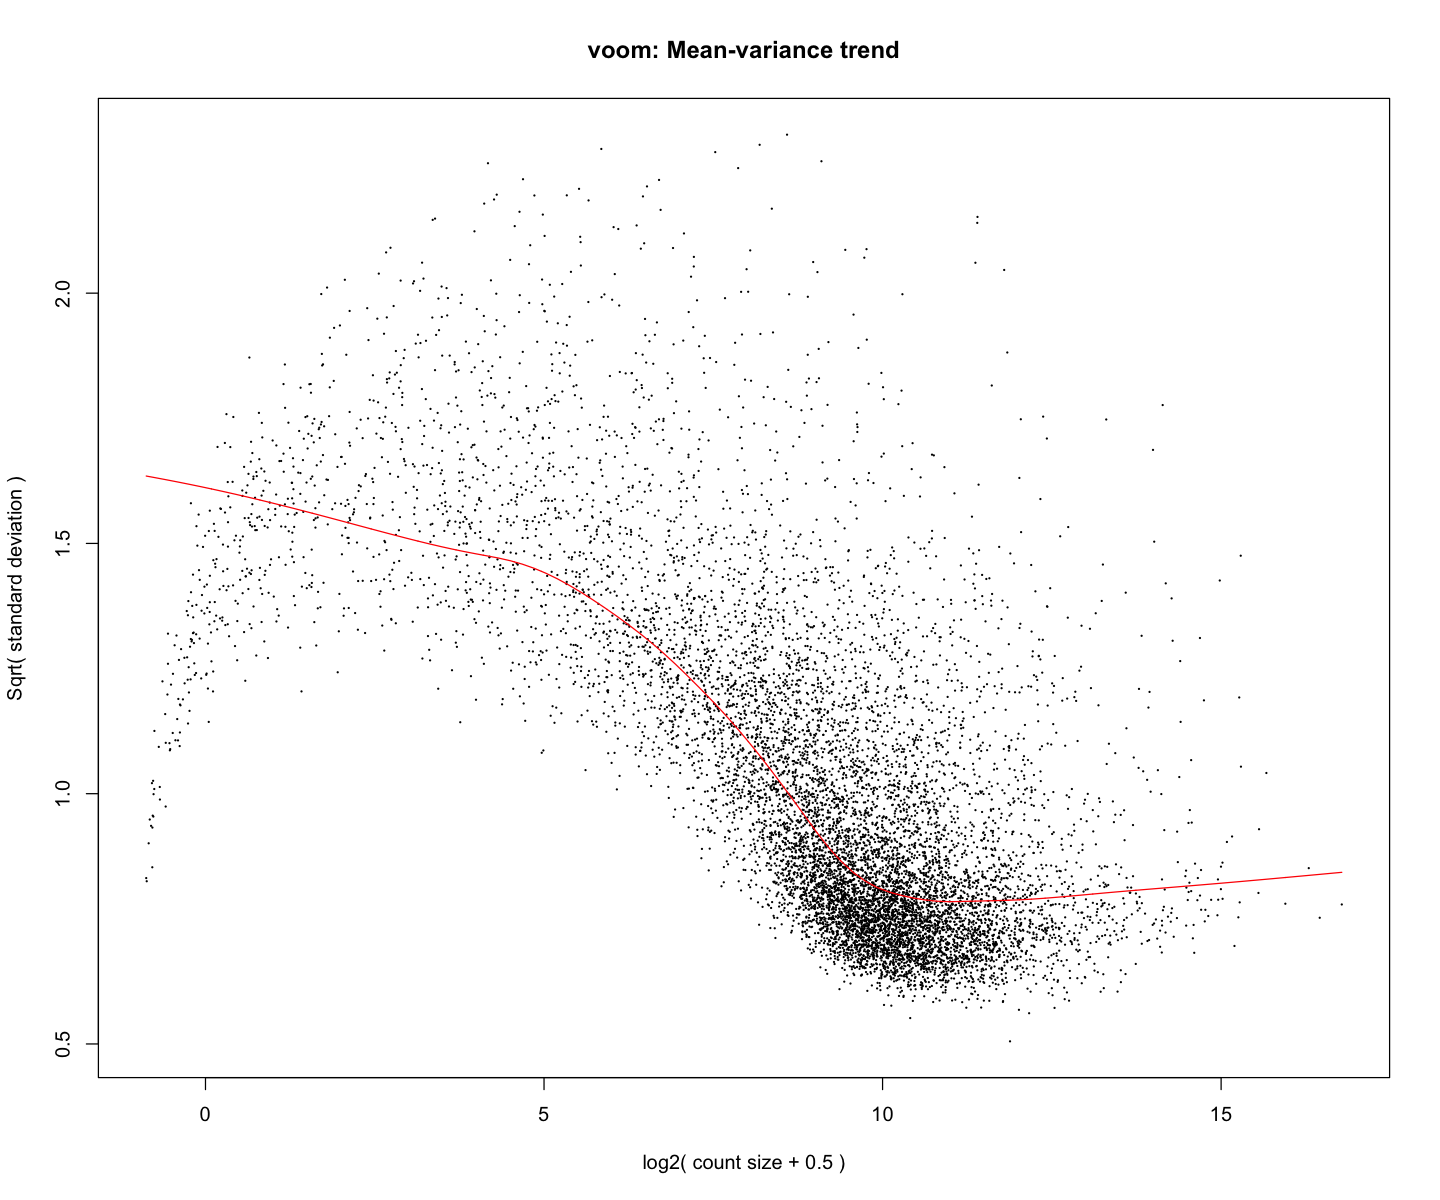

In [46]:
design = model.matrix(~sample_class)
d2 = voom(d1, design, plot = T, normalize = 'quantile') # with normalization

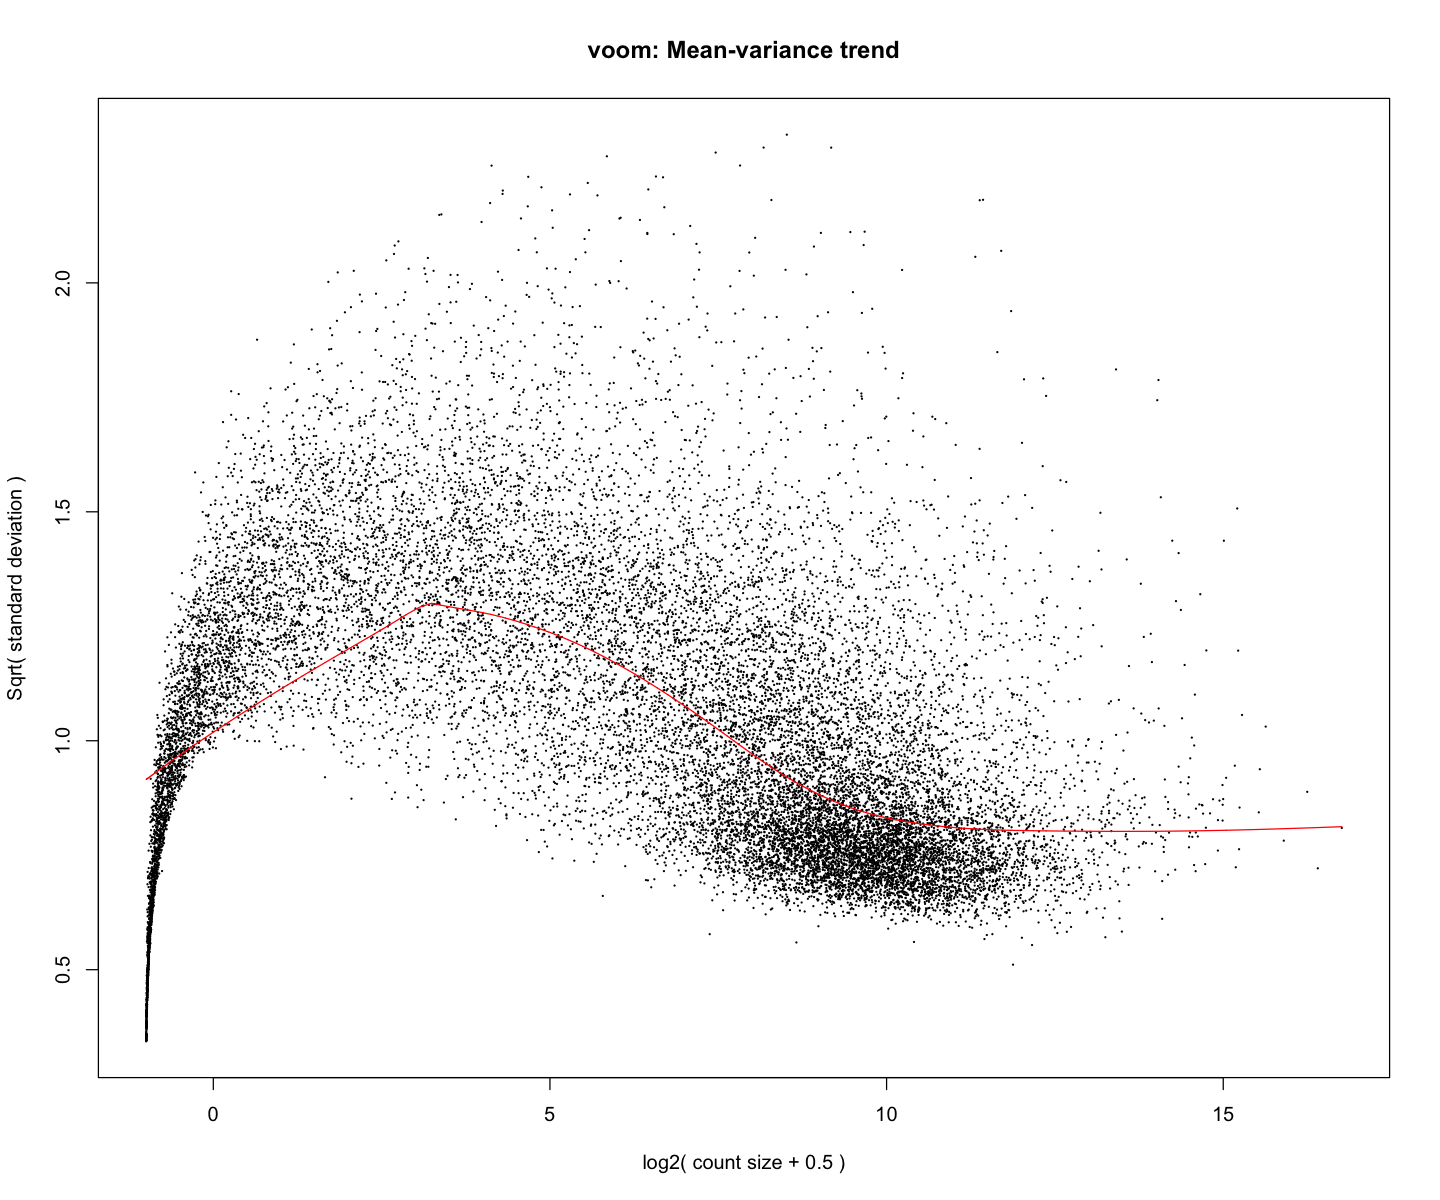

In [47]:
tmp = voom(d0, design, plot = T) # without normalization

In [26]:
fit = lmFit(d2,design)
fit = eBayes(fit,robust=TRUE,trend=TRUE)
top.table = topTable(fit, n=Inf) %>% na.omit()

Removing intercept from test coefficients



In [27]:
head(top.table)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PI16,-8.743755,-1.1003723,-35.68041,2.077087e-130,2.119252e-126,286.9017
CLEC3B,-4.895693,1.8448565,-33.47286,1.182413e-121,6.032081e-118,267.0526
SCARA5,-6.882446,-0.5197688,-29.80786,1.524760e-106,5.185707e-103,232.3952
FAM107A,-4.950077,1.4053314,-29.71641,3.707631e-106,9.457241e-103,231.5709
ADH1B,-7.668227,0.1653024,-28.06867,3.902400e-99,7.963238e-96,215.4742
TCF21,-4.310925,1.8396096,-26.75705,1.862390e-93,3.166994e-90,202.5091


In [28]:
DEG_table = 
    top.table %>%
    rownames_to_column('gene') %>%
    as_tibble() %>%
    dplyr::select(gene, everything())

In [29]:
head(DEG_table)

gene,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PI16,-8.743755,-1.1003723,-35.68041,2.077087e-130,2.119252e-126,286.9017
CLEC3B,-4.895693,1.8448565,-33.47286,1.182413e-121,6.032081e-118,267.0526
SCARA5,-6.882446,-0.5197688,-29.80786,1.524760e-106,5.185707e-103,232.3952
FAM107A,-4.950077,1.4053314,-29.71641,3.707631e-106,9.457241e-103,231.5709
ADH1B,-7.668227,0.1653024,-28.06867,3.902400e-99,7.963238e-96,215.4742
TCF21,-4.310925,1.8396096,-26.75705,1.862390e-93,3.166994e-90,202.5091


## 2.3. ORA by clusterProfiler

In [ ]:
library(org.Hs.eg.db)
library(clusterProfiler)

In [31]:
# DEG table: up- / down-regulated DEG
DEG_table_up = filter(DEG_table, P.Value <= 0.05, logFC > 1) %>% arrange(desc(logFC))
DEG_table_dn = filter(DEG_table, P.Value <= 0.05, logFC < -1) %>% arrange(desc(logFC))

# DEG gene list for ORA/GSEA
geneList_up = DEG_table_up$logFC %>% setNames(DEG_table_up$gene)
geneList_dn = DEG_table_dn$logFC %>% setNames(DEG_table_dn$gene)

In [32]:
DEG_ora_up = enrichGO(
    gene = names(geneList_up),
    OrgDb = org.Hs.eg.db,
    keyType="SYMBOL",
    ont = "BP",
    pAdjustMethod = "BH")
DEG_ora_up

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:992] "CST1" "CA9" "COL11A1" "COL10A1" "ESM1" "KIF18B" "MMP11" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...224 enriched terms found
'data.frame':	224 obs. of  9 variables:
 $ ID         : chr  "GO:0140014" "GO:0000280" "GO:0000070" "GO:0048285" ...
 $ Description: chr  "mitotic nuclear division" "nuclear division" "mitotic sister chromatid segregation" "organelle fission" ...
 $ GeneRatio  : chr  "65/812" "75/812" "45/812" "76/812" ...
 $ BgRatio    : chr  "286/18866" "428/18866" "161/18866" "476/18866" ...
 $ pvalue     : num  3.78e-29 8.73e-26 1.68e-24 1.69e-23 2.67e-23 ...
 $ p.adjust   : num  1.82e-25 2.10e-22 2.70e-21 2.03e-20 2.57e-20 ...
 $ qvalue     : num  1.67e-25 1.92e-22 2.47e-21 1.86e-20 2.35e-20 ...
 $ geneID     : chr  "KIF18B/UBE2C/MYBL2/BIRC5/AURKB/TTK/NUF2/CDC20/DLGAP5/PKMYT1/TPX2/NCAPH/CDT1/KIF4A/NCAPG/KIF2C/BUB1B/CDK1/CCNB2/"| __trunc

In [33]:
DEG_ora_dn = enrichGO(
    gene = names(geneList_dn),
    OrgDb = org.Hs.eg.db,
    keyType="SYMBOL",
    ont = "BP",
    pAdjustMethod = "BH")
    DEG_ora_dn

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:1273] "FRZB" "HERC1" "LRCH1" "SERINC1" "UBL3" "DIP2C" "LPHN2" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...1636 enriched terms found
'data.frame':	1636 obs. of  9 variables:
 $ ID         : chr  "GO:0003012" "GO:0006936" "GO:0030198" "GO:0043062" ...
 $ Description: chr  "muscle system process" "muscle contraction" "extracellular matrix organization" "extracellular structure organization" ...
 $ GeneRatio  : chr  "106/1127" "86/1127" "84/1127" "84/1127" ...
 $ BgRatio    : chr  "467/18866" "362/18866" "395/18866" "396/18866" ...
 $ pvalue     : num  5.03e-34 3.06e-29 4.89e-25 5.86e-25 7.43e-21 ...
 $ p.adjust   : num  2.74e-30 8.34e-26 7.98e-22 7.98e-22 8.10e-18 ...
 $ qvalue     : num  1.70e-30 5.17e-26 4.95e-22 4.95e-22 5.03e-18 ...
 $ geneID     : chr  "GJA1/ERRFI1/ITGA1/FOXO1/PLCE1/SNTA1/AKAP13/DYSF/ADRA2C/ROCK2/SMAD7/GPD1L/TLN1/CXCR4/ARG2/GATM/VCL/A

## 2.3. GSEA by clusterProfiler

In [34]:
DEG_gsea_up = gseGO(
    gene = geneList_up,
    OrgDb = org.Hs.eg.db,
    keyType="SYMBOL",
    ont = "BP",
    pAdjustMethod = "BH")

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in fgseaMultilevel(...):
“There were 2 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



In [35]:
DEG_gsea_dn = gseGO(
    gene = geneList_dn,
    OrgDb = org.Hs.eg.db,
    keyType="SYMBOL",
    ont = "BP",
    pAdjustMethod = "BH")

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“There were 8 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
leading edge analysis...

done...



## 2.4 ORA/GSEA visualization

wrong orderBy parameter; set to default `orderBy = "x"`



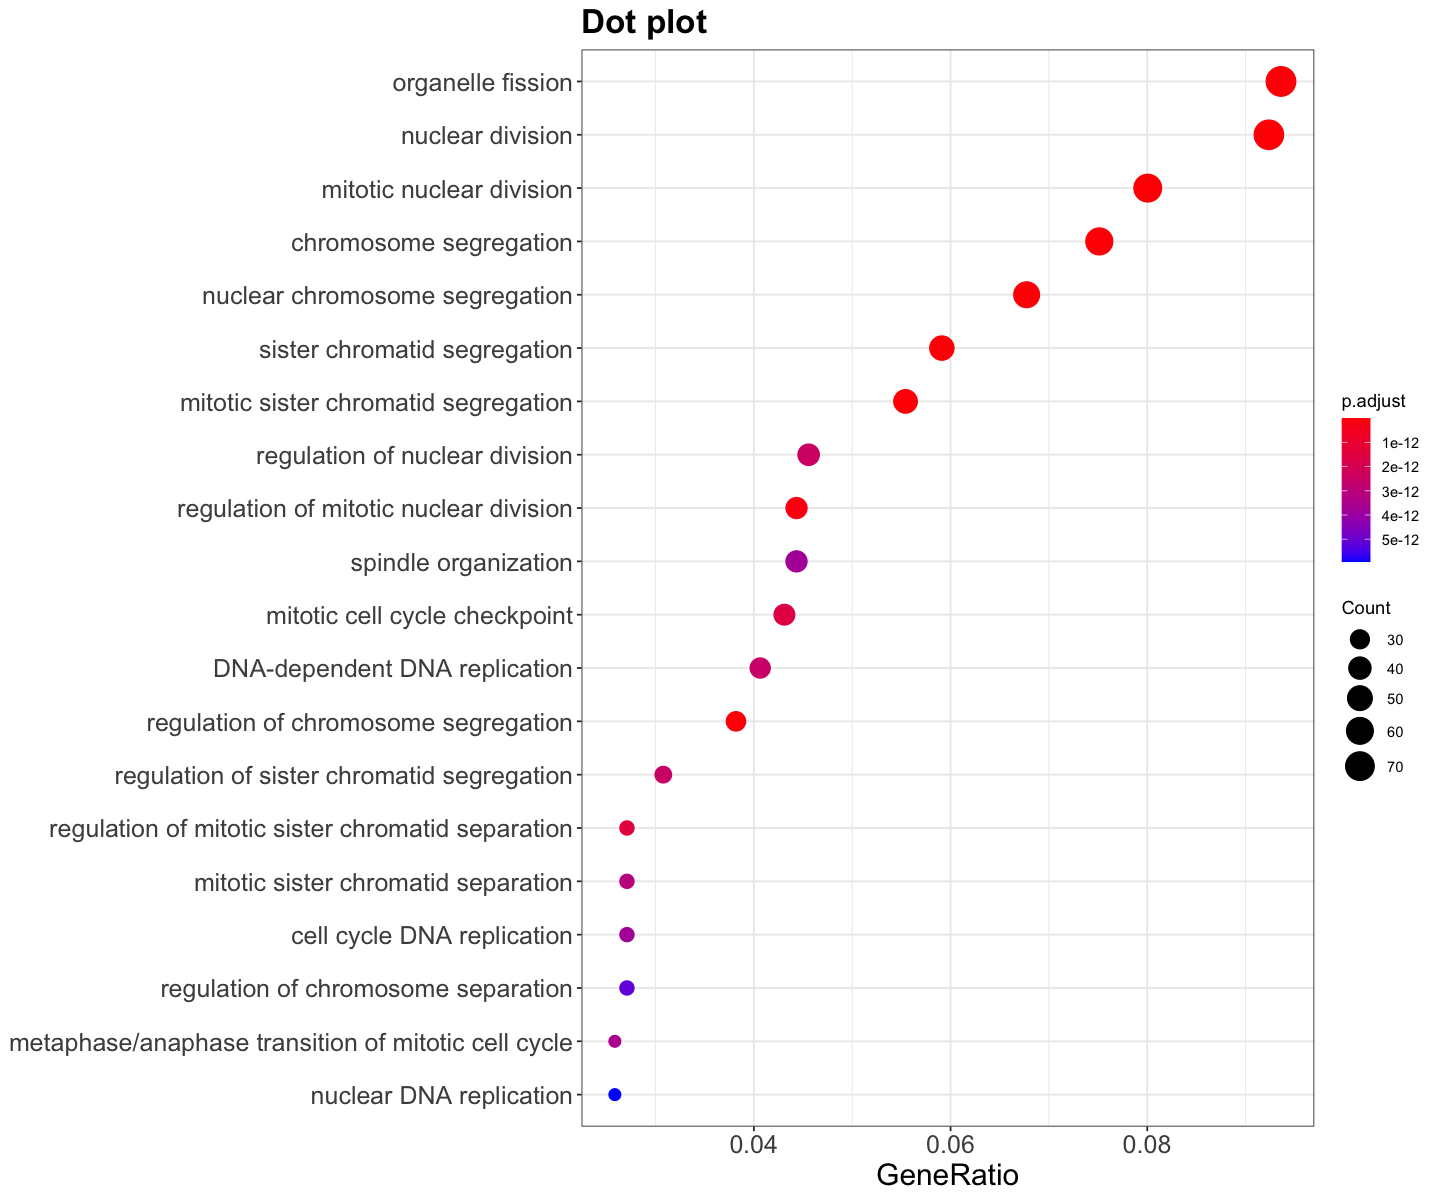

In [48]:
dotplot(DEG_ora_up, showCategory = 20) + 
    labs(title = "Dot plot") +
    theme_bw() +
    theme(
        plot.title = element_text(face = 'bold', size = 20),
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 18)
    )

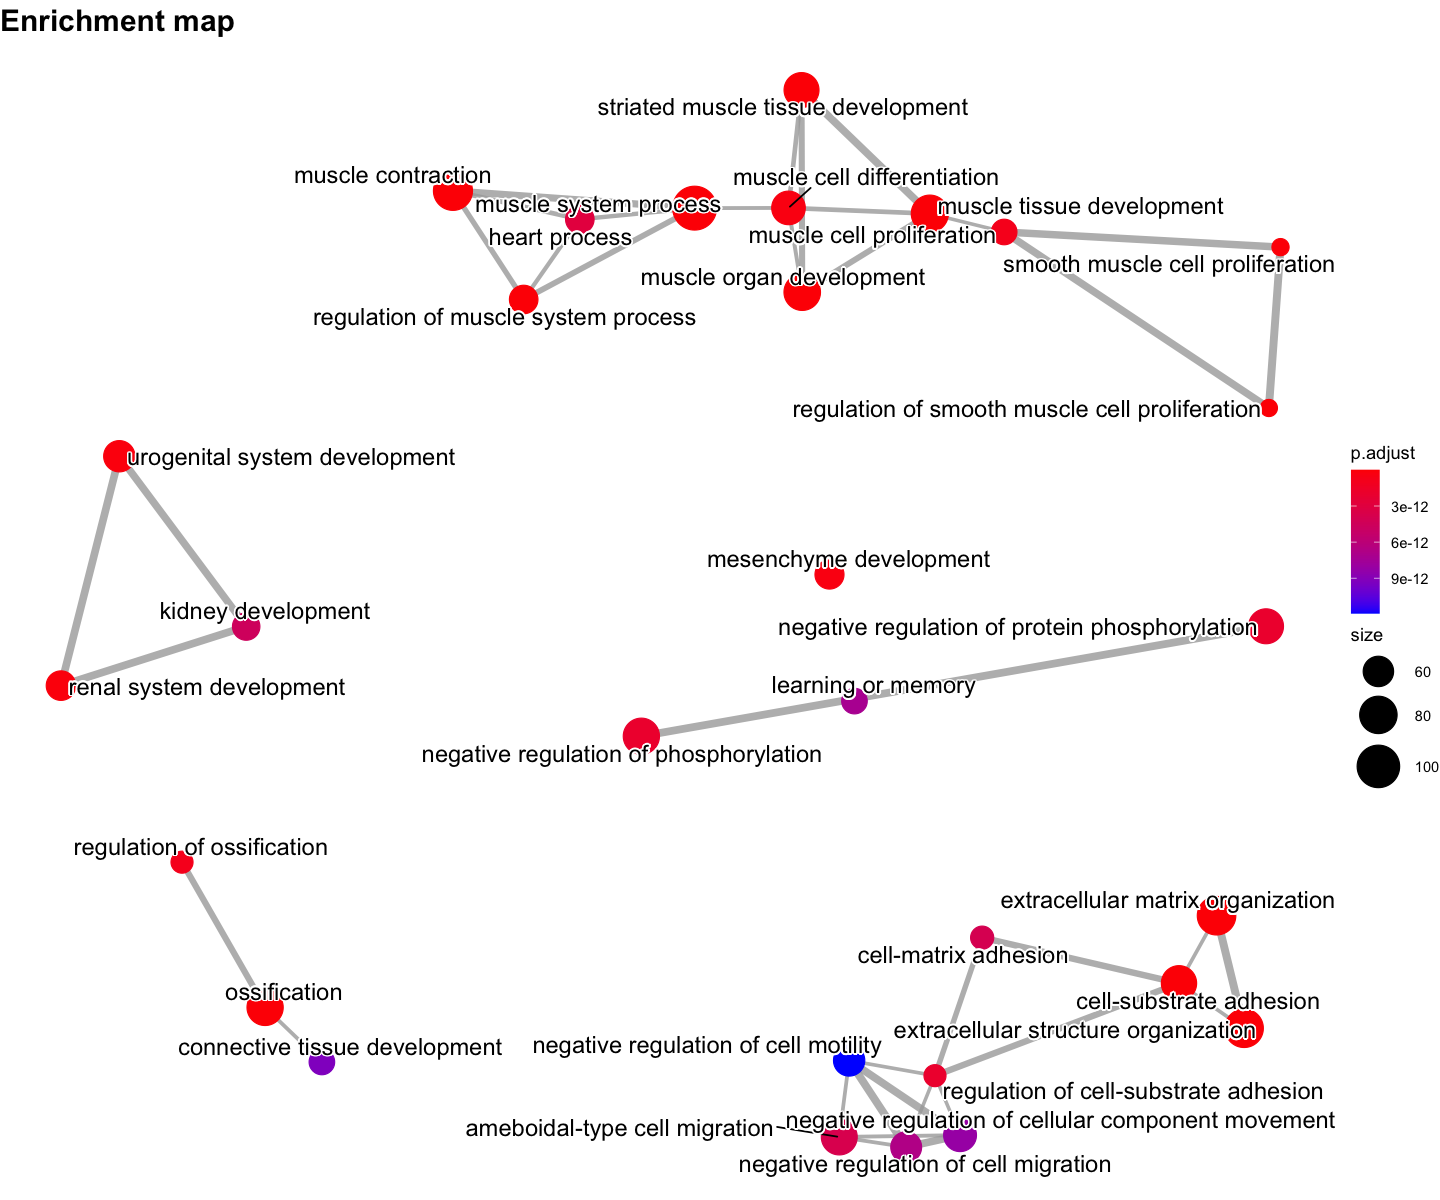

In [49]:
require(enrichplot)
DEG_ora_dn %>%
    pairwise_termsim() %>%
    emapplot(layout = 'kk', cex_category = 1.5) +
    labs(title = 'Enrichment map') +
    theme(plot.title = element_text(size = 18, face = 'bold'))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



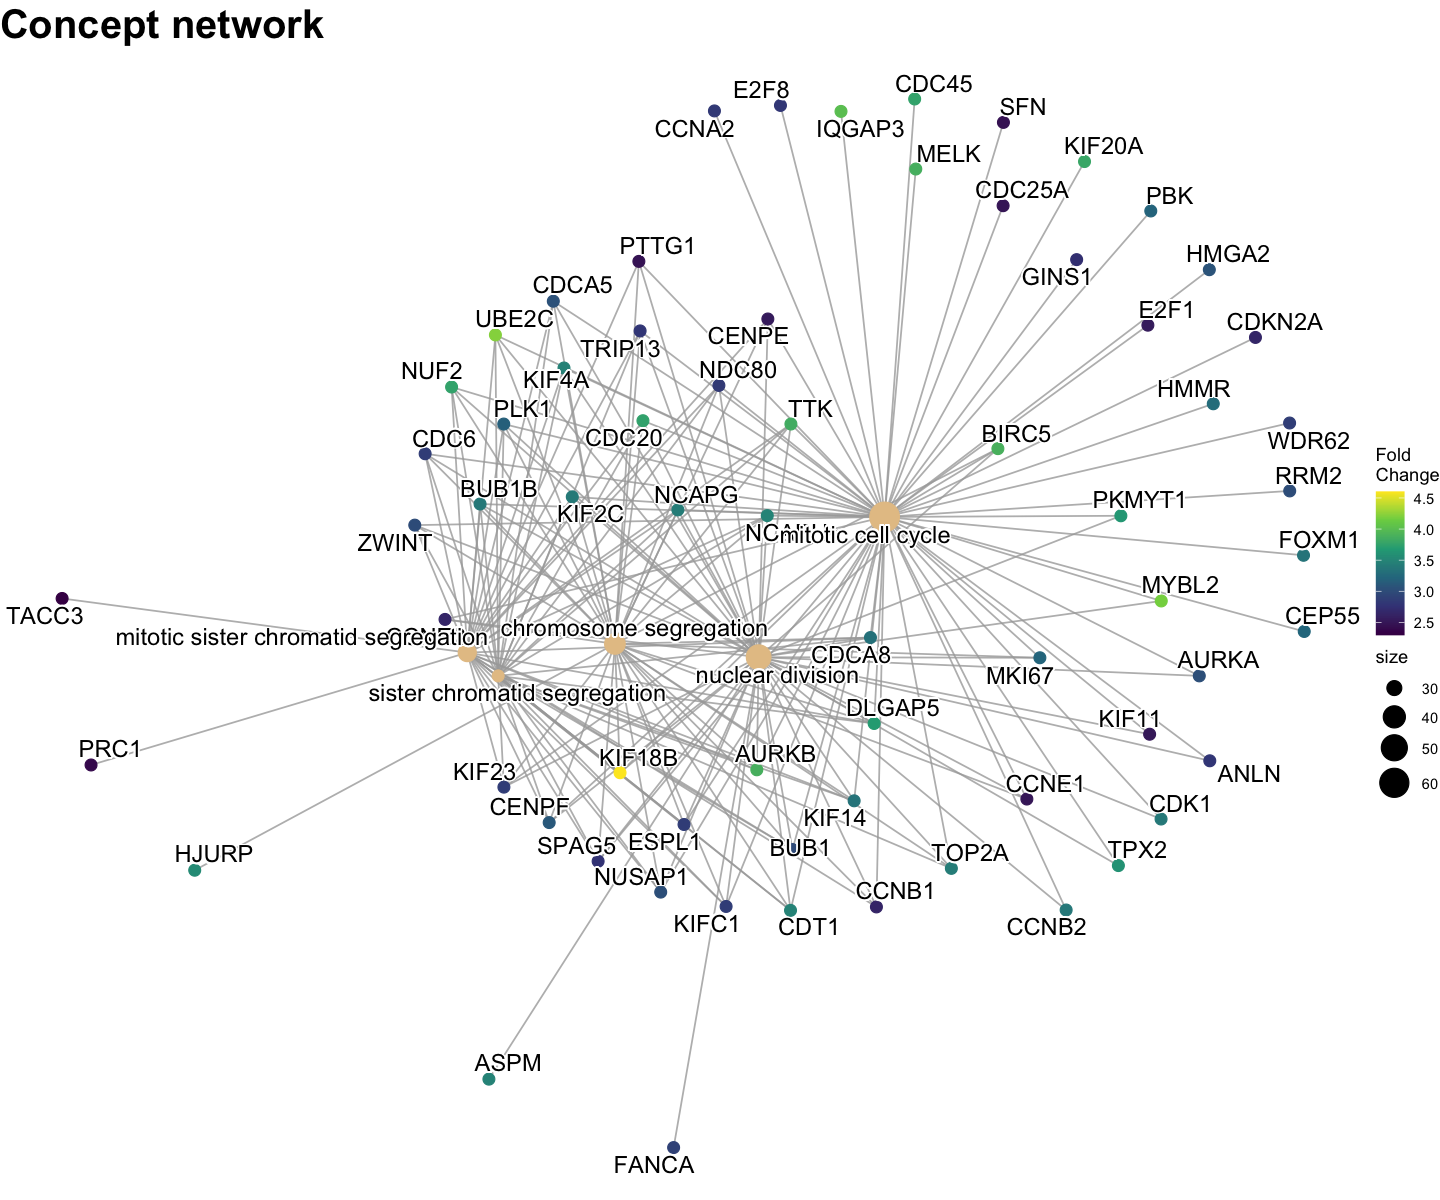

In [50]:
enrichplot::cnetplot(DEG_gsea_up, foldChange = geneList_up) +
    scale_color_viridis_c() + 
    labs(color = 'Fold\nChange', title = 'Concept network') +
    theme_void() +
    theme(plot.title = element_text(face = 'bold', size = 24))

In [40]:
DEG_gsea_dn@result %>% as_tibble()

ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0044057,regulation of system process,103,-0.4419963,-1.902109,2.218444e-06,0.004490130,0.004278093,522,"tags=68%, list=41%, signal=44%",CHGA/CACNA1C/FLNA/HRC/TSHZ3/PDE4D/KCNE4/SLC8A1/PER2/TNNT2/CACNB4/HBEGF/BVES/ABCC9/TPM1/ANXA6/HGF/RYR2/NPR1/POPDC2/BIN1/MGLL/PDE4B/ITPR1/KIT/KCNA1/EDNRB/PDE5A/AQP1/BDKRB2/IGFBP5/TNNT3/FGFR1/NPTX1/KLF4/EGR2/AKAP6/PTGS2/CELF2/GNAO1/RGS2/KCNK3/TACR2/MYL9/PPP1R12B/KCNMA1/DMD/CACNA1H/IGF1/SCN11A/PPARGC1A/KCNH2/FXYD6/TPPP/HAND2/ADIPOQ/HSPB7/RELN/ANK2/PLN/SGCA/NR4A3/P2RX1/MYOCD/CNN1/CASQ2/HSPB6/DES/ATP1A2/PI16
GO:0061061,muscle structure development,126,-0.4117876,-1.802726,4.666179e-06,0.004722173,0.004499179,462,"tags=57%, list=36%, signal=40%",PDGFRA/TNNT2/BTG2/CSRP1/DKK1/HBEGF/BVES/CDON/TPM1/USP2/RYR2/ZEB1/POPDC2/TMOD1/BIN1/SMTN/CFL2/KIT/ISL1/EDNRB/TGFBR3/IGFBP5/BOC/SYNE1/TNNT3/FGFR1/LAMA2/ACTN2/EGR2/AKAP6/ITGA7/ELN/JPH2/SPEG/TAGLN/SGCD/RBPMS2/RGS2/ATF3/FGF2/FOS/GATA6/CNTFR/DCN/EGR1/LDB3/PDLIM3/DMD/CACNA1H/FOXF1/IGF1/MYLK/SORBS2/CRYAB/ASB2/MYOM1/SOSTDC1/ANK2/EGR3/TCF21/RBM24/FHL1/SGCA/LMOD1/FLNC/MYOCD/HLF/MYH11/CASQ2/PGM5/ACTC1/PI16
GO:0003012,muscle system process,106,-0.4363289,-1.883700,1.035101e-05,0.006983478,0.006653699,416,"tags=55%, list=33%, signal=40%",TPM1/ANXA6/RYR2/TMOD1/BIN1/SMTN/PDE4B/KIT/KCNA1/EDNRB/PDE5A/TPM2/BDKRB2/IGFBP5/TNNT3/KLF4/ACTN2/AKAP6/PTGS2/ACTA2/SGCD/GNAO1/RGS2/TACR2/GATA6/MYL9/PPP1R12B/KCNMA1/DMD/CACNA1H/IGF1/MYLK/PPARGC1A/KCNH2/SORBS2/CRYAB/DTNA/SORBS1/MYOM1/HAND2/ANK2/PLN/SGCA/LMOD1/NR4A3/ACTG2/P2RX1/SYNM/MYOCD/CNN1/MYH11/CASQ2/HSPB6/MYOC/DES/ACTC1/ATP1A2/PI16
GO:0007517,muscle organ development,77,-0.4410292,-1.838419,7.622068e-05,0.032193206,0.030672953,454,"tags=62%, list=36%, signal=43%",TNNT2/BTG2/DKK1/HBEGF/BVES/CDON/TPM1/USP2/RYR2/POPDC2/SMTN/CFL2/ISL1/TGFBR3/FGFR1/LAMA2/EGR2/AKAP6/ITGA7/ELN/JPH2/SPEG/TAGLN/SGCD/RGS2/ATF3/FGF2/FOS/GATA6/CNTFR/DCN/EGR1/DMD/CACNA1H/IGF1/MYLK/CRYAB/ASB2/MYOM1/EGR3/TCF21/RBM24/FHL1/SGCA/MYOCD/HLF/ACTC1/PI16
GO:0006936,muscle contraction,86,-0.4267307,-1.803757,7.952867e-05,0.032193206,0.030672953,416,"tags=55%, list=33%, signal=39%",TPM1/ANXA6/RYR2/TMOD1/BIN1/SMTN/PDE4B/KIT/KCNA1/EDNRB/PDE5A/TPM2/BDKRB2/TNNT3/ACTN2/PTGS2/ACTA2/SGCD/GNAO1/RGS2/TACR2/MYL9/PPP1R12B/KCNMA1/DMD/CACNA1H/MYLK/KCNH2/CRYAB/DTNA/SORBS1/MYOM1/ANK2/PLN/SGCA/LMOD1/ACTG2/P2RX1/SYNM/MYOCD/CNN1/MYH11/CASQ2/HSPB6/DES/ACTC1/ATP1A2
GO:0003008,system process,258,-0.3380964,-1.539183,1.258343e-04,0.039599710,0.037729701,587,"tags=59%, list=46%, signal=40%",SPTBN4/SLMAP/RCSD1/SSPN/JPH4/EDNRA/S1PR1/SYT11/SCN3A/MAPT/SERPINF1/ITGA5/CAV1/GAS6/CNR1/CHL1/CXCR2/CHGA/MEF2C/SERPINE2/CACNA1C/FLNA/RBP4/HRC/GSN/TSHZ3/CD34/NCALD/PDE4D/CALD1/KCNE4/SLC8A1/HBB/PER2/TRPA1/TNNT2/BTG2/CACNB4/DKK1/HBEGF/AQP4/BVES/ABCC9/TPM1/ANXA6/HGF/RYR2/NPR1/POPDC2/TMOD1/BIN1/SMTN/MGLL/CCL2/PDE4B/ITPR1/GRIK5/MAP1A/KIT/KCNA1/EDNRB/PDE5A/AQP1/PRKAR2B/TPM2/BDKRB2/IGFBP5/JAM3/CYP1B1/TNNT3/FGFR1/NPTX1/CLDN5/KLF4/ACTN2/PTPRZ1/EGR2/EFEMP1/AKAP6/NFASC/AKAP12/PTGS2/SOBP/ELN/CELF2/LAMC3/ARC/SERPINA3/ACTA2/SGCD/CXCL12/GNAO1/PDE2A/EYA1/RGS2/NTRK2/KCNK3/CPA3/TACR2/SVEP1/FOS/GATA6/MYL9/PPP1R12B/PPP1R1B/KCNMA1/DMD/CACNA1H/IGF1/MYLK/SCN11A/PPARGC1A/KCNH2/SORBS2/SH3GL2/CRYAB/FXYD6/DTNA/KCNMB1/SORBS1/MYOM1/BCHE/CRYM/TPPP/HAND2/ADIPOQ/HSPB7/PTGS1/RELN/ANK2/PLN/CTSG/NPAS4/SGCA/LMOD1/NR4A3/CES1/SLC2A4/ACTG2/P2RX1/ADCY5/SYNM/FAM107A/MYOCD/CNN1/MYH11/CASQ2/HSPB6/MYOC/DES/ACTC1/ATP1A2/PI16
GO:0097305,response to alcohol,37,-0.5210798,-1.982922,1.369555e-04,0.039599710,0.037729701,332,"tags=57%, list=26%, signal=43%",TGFBR3/KLF9/CCL19/KLF4/CCL21/KLF2/RGS2/FOS/CDO1/SLIT3/KCNMB1/ADIPOQ/MAOB/CSF3/NPAS4/FOSB/SFRP1/CES1/SLC2A4/ADCY5/ACTC1


In [51]:
term_of_interest = 'differentiation'
idx = grep(DEG_gsea_up@result$Description, pattern = term_of_interest, value = F, ignore.case = T)
grep(DEG_gsea_up@result$Description, pattern = term_of_interest, value = T, ignore.case = T)

[1] "cell differentiation"            "epidermal cell differentiation" 
[3] "keratinocyte differentiation"    "epithelial cell differentiation"

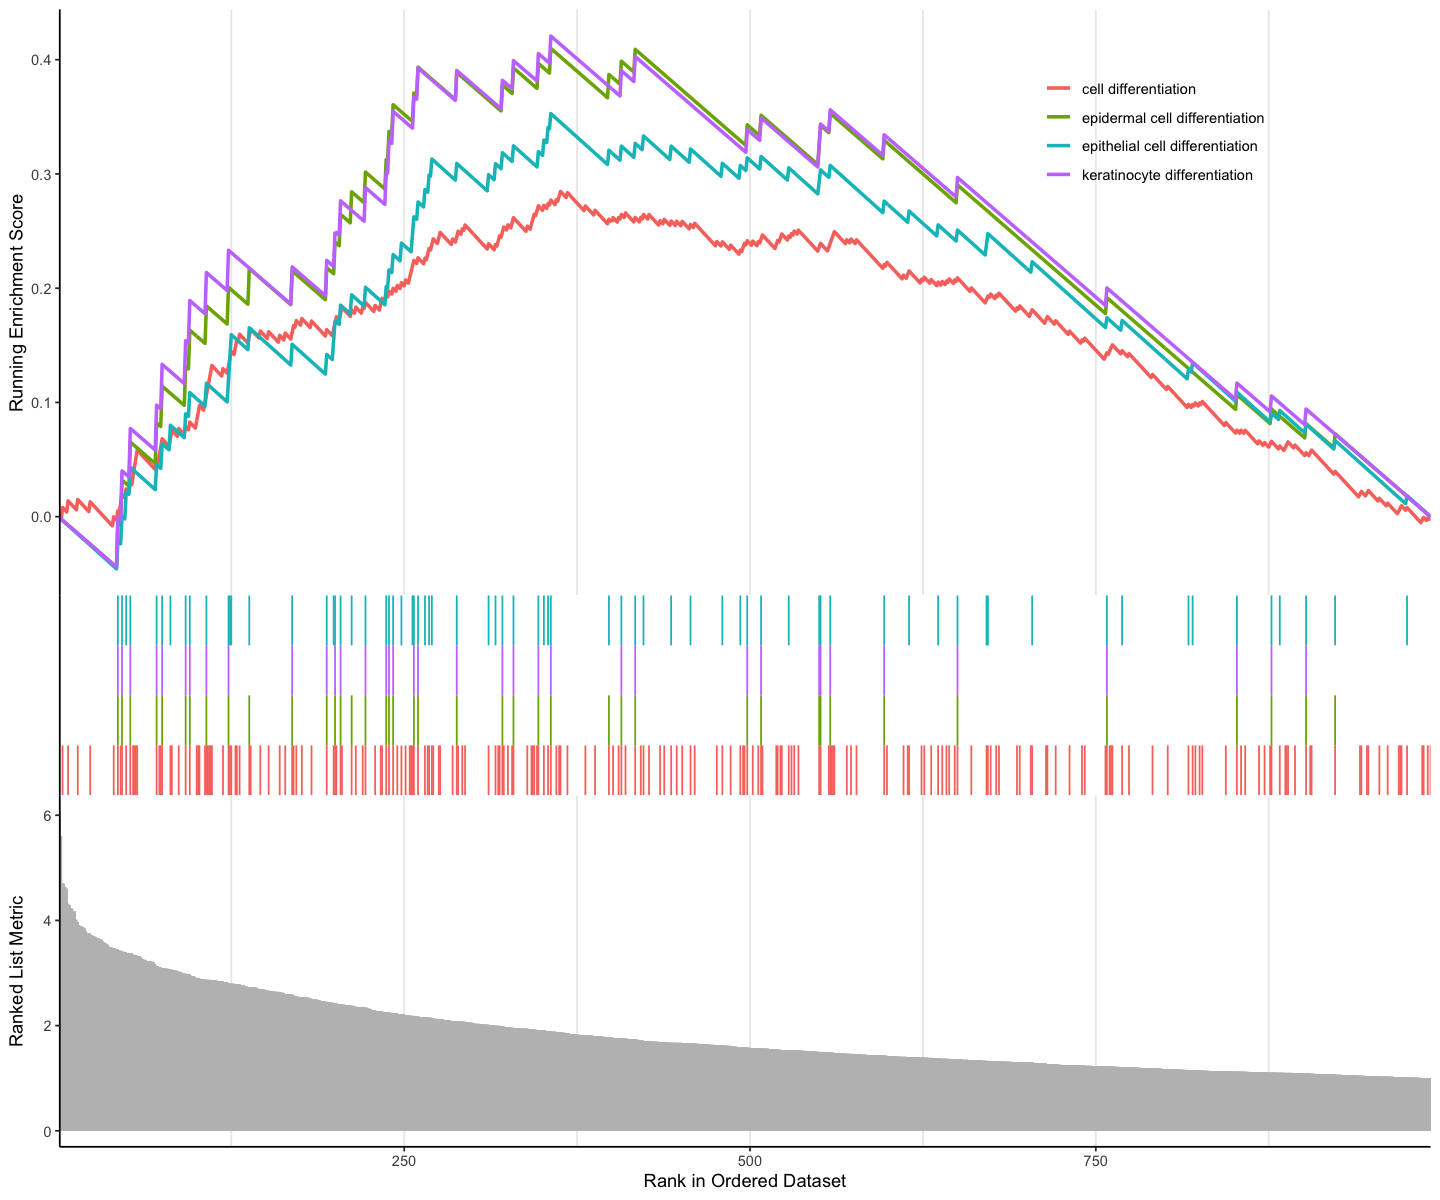

In [52]:
gseaplot2(DEG_gsea_up, geneSetID = idx)

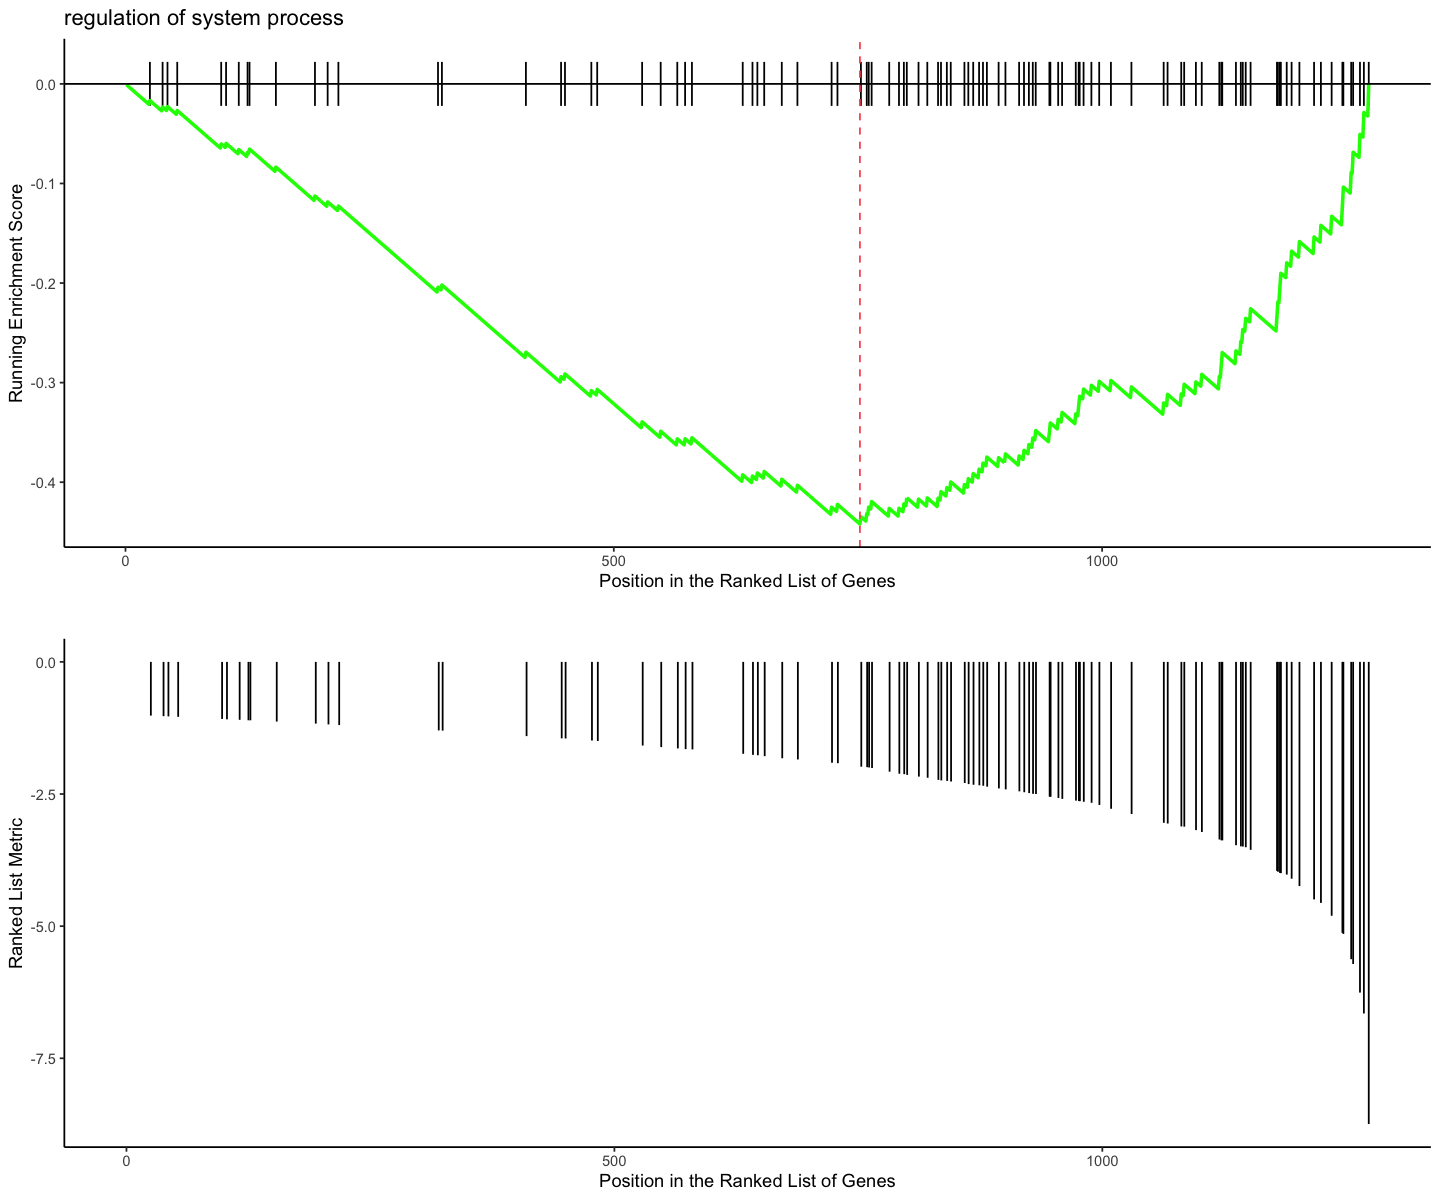

In [53]:
ggpubr::ggarrange(
    gseaplot(DEG_gsea_dn, geneSetID = 1, by = 'runningScore', title = DEG_gsea_dn@result$Description[1]) + 
        theme_classic(),
    gseaplot(DEG_gsea_dn, geneSetID = 1, by = 'preranked') + 
        theme_classic(),
    ncol =1, nrow = 2)